# Failed experiment

(OOM - kernel dies unless filtering by date)

2023-11-27 - pandas memory usage seems to have improved. It is now possible to process at least ten years data (previously it was five) with 32GB RAM.

In [1]:
import pandas as pd

In [2]:
%%time

fuel_type_df = (
    pd.read_parquet(
        "../../test_result.parquet",
        columns=["test_result", "test_date", "fuel_type"],
        dtype_backend="pyarrow",
        filters=[
            ("test_result", "==", "P"),
            ("test_date", ">=", pd.Timestamp("2012-01-01")),
        ],
    )
    .replace({"fuel_type": {"Hybrid Electric (Clean)": "HY", "Electric": "EL"}})
    .assign(Year=lambda x: x.test_date.dt.year)
    .groupby(["Year", "fuel_type"])
    .agg({"test_result": "count"})
    .rename(columns={"test_result": "vehicle_count"})
)

CPU times: user 49.4 s, sys: 8.07 s, total: 57.5 s
Wall time: 30.3 s


In [3]:
fuel_type_df = fuel_type_df.pivot_table(
    values="vehicle_count",
    index="Year",
    columns="fuel_type",
    aggfunc="sum",
    fill_value=0,
)

fuel_type_df.head()

fuel_type,CN,DI,ED,EL,FC,GA,GB,GD,HY,LN,LP,OT,PE,ST
Year,,,,,,,,,,,,,,
2012,83,8641472,3,22185,394,63,790,8,9665,61,27094,14594,16577444,105
2013,102,9220722,7,28685,471,64,797,6,13830,51,25039,19979,16313546,60
2014,130,9844505,32,36652,598,59,762,7,19733,52,22540,26360,16002808,61
2015,139,10447344,762,43781,700,68,829,8,33979,42,20245,31305,15735742,63
2016,136,11093589,3453,45482,705,76,776,18,67064,36,17871,31582,15521032,56


Text(0, 0.5, 'Count (million)')

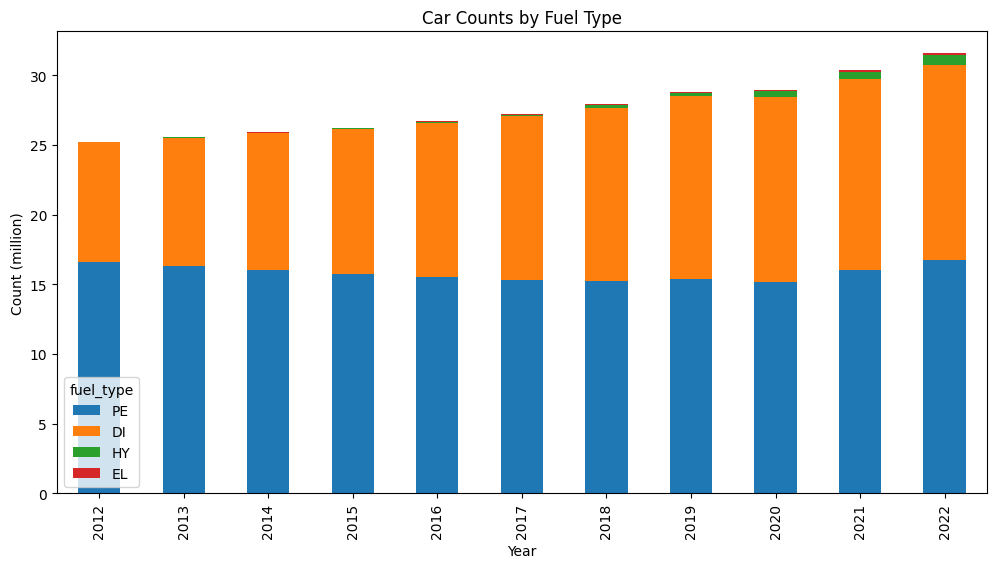

In [4]:
ax = (
    fuel_type_df.loc[2006:, ["PE", "DI", "HY", "EL"]]
    .div(1000000)
    .reset_index()
    .plot.bar(figsize=(12, 6), x="Year", stacked=True, title="Car Counts by Fuel Type")
)
ax.set_ylabel("Count (million)")